In [202]:
import pandas as pd
import create_hist_mod as ch

In [203]:
poste_code_to_region = pd.read_csv("postcodeccg.csv",sep=",",encoding = "ISO-8859-1")

In [204]:
poste_code_to_region.shape

(2582832, 4)

In [205]:
poste_code_to_region.dtypes

pcd      object
ccg      object
lat     float64
long    float64
dtype: object

In [206]:
list_unique_region=poste_code_to_region.groupby('ccg').ccg.nunique()
list_unique=poste_code_to_region["ccg"].unique()

In [207]:
# In metod creating_dataframe_from_database_querying the first argument has to be an SQL query
#and the second argument a database name
database_name='raisers_edge_data.db'
query='''select Analysis_Membership_View.CONSTITUENT_ID,Analysis_Address_View.POST_CODE 
from Analysis_Membership_View 
left join  Analysis_Address_View 
on Analysis_Membership_View.CONSTITUENT_ID
=Analysis_Address_View.CONSTITUENT_ID 
where Analysis_Membership_View.Current_Standing != 'Dropped' ; '''
df_database=ch.creating_dataframe_from_database_querying(query,database_name,return_shape=True)

shape of created dataframe  (37218, 2)


In [208]:
df_database.head(2)

,CONSTITUENT_ID,POST_CODE
0,100050,24001
1,100211,GL5 3SW


In [209]:
def merge_on_post_code(df1,df2,left_merge):
    df_aus=df1
    df_aus = df_aus.merge(df2,\
    left_on=left_merge, right_on='pcd',how="left")
    df_aus=df_aus.dropna(subset=['ccg'])
    count_per_region=df_aus.groupby('ccg').CONSTITUENT_ID.nunique()
    return count_per_region

In [210]:
count_per_region_members=merge_on_post_code(df_database,poste_code_to_region,'POST_CODE')
count_per_region_members2=list_unique_region.add(count_per_region_members)
count_per_region_members2=count_per_region_members2.fillna(0)

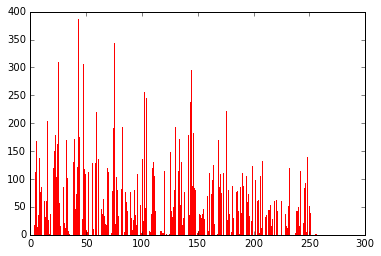

In [211]:
list_unique_aus=len(list_unique)
list_unique2=range(0,list_unique_aus-1)
%matplotlib inline
import matplotlib.pyplot as plt
plt.bar(list_unique2,count_per_region_members2,color='r',edgecolor='none')
plt.show()

In [212]:
# In metod creating_dataframe_from_database_querying the first argument has to be an SQL query
#and the second argument a database name
database_name='raisers_edge_data.db'
query='''select Analysis_Gift_Split_View.CONSTITUENT_ID, 
Analysis_Address_View.POST_CODE 
from Analysis_Gift_Split_View
left join  Analysis_Address_View 
on Analysis_Gift_Split_View.CONSTITUENT_ID
=Analysis_Address_View.CONSTITUENT_ID ; '''
df_gift_view_post_code=ch.creating_dataframe_from_database_querying(query,database_name,return_shape=True)

shape of created dataframe  (3646303, 2)


In [213]:
count_per_region_gift=merge_on_post_code(df_gift_view_post_code,poste_code_to_region,'POST_CODE')
count_per_region_gift2=list_unique_region.add(count_per_region_gift)
count_per_region_gift2=count_per_region_gift2.fillna(0)

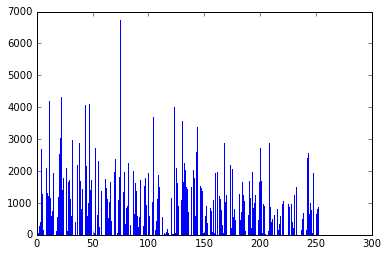

In [214]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.bar(list_unique2,count_per_region_gift2,color='b',edgecolor='none')
plt.show()

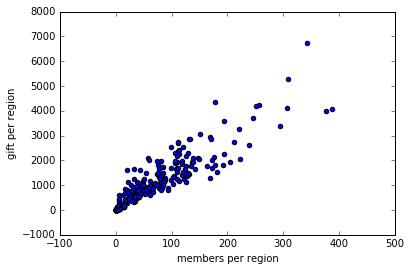

In [215]:
plt.scatter(count_per_region_members2,count_per_region_gift2)
plt.xlabel('members per region')
plt.ylabel('gift per region')

In [236]:
import pickle
documents_f = open("Mosaic_dataframe.pickle", "rb") ####
df_mosaic = pickle.load(documents_f)
documents_f.close()
#df_mosaic.head()

In [217]:
df_mosaic_new=df_mosaic[['TC_Name1','TC_Postcode']]
type(df_mosaic_new)

pandas.core.frame.DataFrame

In [218]:
def merge_on_post_code2(df1,df2,left_merge):
    df_aus=df1
    df_aus = df_aus.merge(df2,\
    left_on=left_merge, right_on='pcd',how="left")
    df_aus=df_aus.dropna(subset=['ccg'])
    count_per_region=df_aus.groupby('ccg').TC_Name1.nunique()
    return count_per_region

In [219]:
count_per_region_mosaic=merge_on_post_code2(df_mosaic_new,poste_code_to_region,'TC_Postcode')
count_per_region_mosaic2=list_unique_region.add(count_per_region_mosaic)
count_per_region_mosaic2=count_per_region_mosaic2.fillna(0)


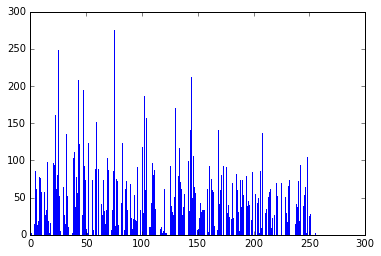

In [220]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.bar(list_unique2,count_per_region_mosaic2,color='b',edgecolor='none')
plt.show()

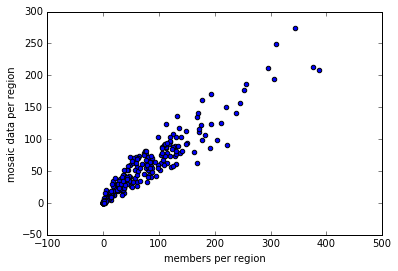

In [222]:
plt.scatter(count_per_region_members2,count_per_region_mosaic2)
plt.xlabel('members per region')
plt.ylabel('mosaic data per region')

In [227]:
df_CDL=pd.read_excel("CDL_data.xlsx")

In [230]:
df_CDL_new=df_CDL[['DeliveryPostcode','OrderNumber']]

In [224]:
def merge_on_post_code3(df1,df2,left_merge):
    df_aus=df1
    df_aus = df_aus.merge(df2,\
    left_on=left_merge, right_on='pcd',how="left")
    df_aus=df_aus.dropna(subset=['ccg'])
    count_per_region=df_aus.groupby('ccg').OrderNumber.nunique()
    return count_per_region

In [232]:
count_per_region_cdl=merge_on_post_code3(df_CDL_new,poste_code_to_region,'DeliveryPostcode')
count_per_region_cdl2=list_unique_region.add(count_per_region_cdl)
count_per_region_cdl2=count_per_region_cdl2.fillna(0)

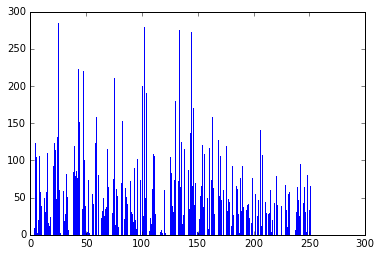

In [233]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.bar(list_unique2,count_per_region_cdl2,color='b',edgecolor='none')
plt.show()

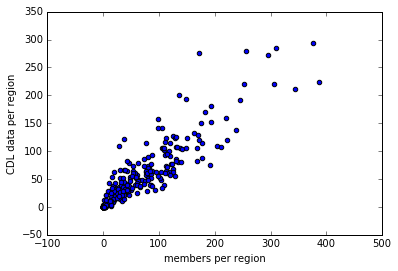

In [235]:
plt.scatter(count_per_region_members2,count_per_region_cdl2)
plt.xlabel('members per region')
plt.ylabel('CDL data per region')

CParserError: Error tokenizing data. C error: Expected 3 fields in line 130, saw 4
